# Rice Crop Yield Prediction

#####
The goal of this project is to find insights on predicting crop yields of rice in India. 
Smallholder farmers, who make up most of the workforce there, face challenges like poverty and malnutrition. Predictive insights can help them make better decisions about resource use, and help in supporting food security.  

The **dataset** can be found on [Kaggle](https://www.kaggle.com/datasets/sudhanshu2198/crop-yield-prediction-hachathon/data)

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, precision_score, recall_score, mean_squared_error, r2_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_validate
import imblearn
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text, plot_tree
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.feature_selection import VarianceThreshold
from lime.lime_tabular import LimeTabularExplainer

### Let's load and examine the data

In [2]:
# to show all columns
pd.set_option('display.max_columns', None)

# to revert: pd.reset_option('display.max_columns')

In [3]:
df = pd.read_csv("data/Train.csv", index_col=0)
df.head(12)

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,200.0,2.0,NaN,NaN,NaN,NaN,2,Urea,NaN,20.0,Broadcasting,Urea,15.0,18.0,NaN,NaN,Broadcasting,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,125.0,3.0,NaN,NaN,NaN,NaN,2,DAP Urea,15.0,10.0,Broadcasting,Urea,20.0,39.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.0,Boring,Electric,80.0,2.0,Ganaura FYM,1.0,1.0,SoilApplied,2,DAP,4.0,NaN,SoilApplied,Urea,5.0,65.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,NaN,NaN,NaN,NaN,NaN,Ganaura,1.0,NaN,SoilApplied,2,DAP Urea,6.0,3.0,Broadcasting,Urea,5.0,5.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.0,Boring,Electric,300.0,2.0,NaN,NaN,NaN,NaN,2,Urea DAP,15.0,30.0,Broadcasting,Urea,30.0,26.0,NaN,NaN,Broadcasting,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550
ID_W5MM9H353RL9,Vaishali,Garoul,10,5,TractorPlough,2022-07-02,6,Manual_PuddledLine,2022-06-15,2022-07-06,1.0,CalendarDate SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWate...,1.0,Boring,Electric,NaN,3.0,FYM,NaN,5.0,SoilApplied,2,DAP Other,6.0,NaN,SoilApplied,Urea,6.0,30.0,NaN,NaN,Broadcasting,hand,2022-10-24,600.0,2022-11-04,hand,30,10,plowed_in_soil,0.136364,205
ID_6O44Z25H1JAV,Jamui,Khaira,12,12,TractorPlough,2022-07-23,3,Manual_PuddledRandom,2022-07-05,2022-07-30,4.0,CalendarDate SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWate...,1.0,Canal,NaN,NaN,6.0,Ganaura,1.0,NaN,SoilApplied,3,DAP,3.0,NaN,Broadcasting,Urea,4.0,28.0,6.0,67.0,Broadcasting,hand,2022-11-04,130.0,2022-12-08,machine,25,10,plowed_in_soil,0.136364,270
ID_VRI9LEL2W3DR,Nalanda,Rajgir,80,80,FourWheelTracRotavator,2022-06-27,4,Broadcasting,NaN,2022-07-22,NaN,NaN,NaN,5.0,Boring,Electric,NaN,3.0,NaN,NaN,NaN,NaN,2,DAP Urea,15.0,8.0,Broadcasting,Urea,15.0,35.0,NaN,NaN,Broadcasting,machine,2022-12-05,NaN,2022-12-06,hand,25,40,plowed_in_soil,0.250000,490
ID_6YA9Y09O55LE,Jamui,Khaira,25,25,TractorPlough,2022-07-24,4,Manual_PuddledRandom,2022-07-09,2022-08-02,4.0,Calend

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3870 entries, ID_GTFAC7PEVWQ9 to ID_KEPOQDTCZC6S
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   District                            3870 non-null   object 
 1   Block                               3870 non-null   object 
 2   CultLand                            3870 non-null   int64  
 3   CropCultLand                        3870 non-null   int64  
 4   LandPreparationMethod               3870 non-null   object 
 5   CropTillageDate                     3870 non-null   object 
 6   CropTillageDepth                    3870 non-null   int64  
 7   CropEstMethod                       3870 non-null   object 
 8   RcNursEstDate                       3787 non-null   object 
 9   SeedingSowingTransplanting          3870 non-null   object 
 10  SeedlingsPerPit                     3581 non-null   float64
 11  NursDetFactor          

In [5]:
df.describe()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,BasalDAP,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3870.000000,3870.000000,3870.000000,3581.000000,3677.000000,2988.000000,3632.000000,1453.000000,1196.000000,3870.000000,3327.000000,2166.000000,3314.000000,3314.000000,1176.000000,1170.000000,3618.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,28.527907,24.727132,4.488372,2.706507,8.017677,379.726908,3.247522,29.731590,57.445652,2.184496,11.452359,13.351801,11.513881,29.200362,7.375000,58.764957,536.622443,26.517829,11.767442,0.292826,594.269251
std,30.454218,27.994802,1.133044,7.624397,42.612470,419.724782,2.207276,122.680882,328.251615,0.634632,8.422049,9.701597,8.715856,12.139109,5.932502,11.356588,1138.613827,3.192873,7.064864,0.206918,651.916953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,0.045455,4.000000
25%,12.000000,10.000000,4.000000,2.000000,2.000000,150.000000,2.000000,1.000000,1.000000,2.000000,6.000000,7.000000,6.000000,23.000000,4.000000,58.000000,150.000000,25.000000,10.000000,0.156250,300.000000
50%,20.000000,20.000000,4.000000,2.000000,4.000000,250.000000,3.000000,3.000000,2.000000,2.000000,10.000000,10.000000,10.000000,28.000000,6.000000,60.000000,400.000000,26.000000,10.000000,0.227273,425.000000
75%,35.000000,30.000000,5.000000,3.000000,6.000000,450.000000,4.000000,4.000000,5.000000,3.000000,15.000000,16.000000,15.000000,36.000000,10.000000,65.000000,700.000000,30.000000,10.000000,0.370370,740.000000
max,800.000000,800.000000,8.000000,442.000000,2000.000000,6000.000000,15.000000,1400.000000,4000.000000,4.000000,100.000000,90.000000,90.000000,332.000000,67.000000,97.000000,60000.000000,30.000000,40.000000,2.187500,16800.000000


#### Get the descriptive statistics 

In [6]:
desc = df.describe() 
# Calculate the 95th percentile for numeric columns only 
percentile_95 = df.select_dtypes(include=[float, int]).quantile(0.99) 
# Append the 95th percentile to the descriptive statistics 
desc.loc['99%'] = percentile_95 
desc

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,BasalDAP,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3870.000000,3870.000000,3870.000000,3581.000000,3677.000000,2988.000000,3632.000000,1453.000000,1196.000000,3870.000000,3327.000000,2166.000000,3314.000000,3314.000000,1176.000000,1170.000000,3618.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,28.527907,24.727132,4.488372,2.706507,8.017677,379.726908,3.247522,29.731590,57.445652,2.184496,11.452359,13.351801,11.513881,29.200362,7.375000,58.764957,536.622443,26.517829,11.767442,0.292826,594.269251
std,30.454218,27.994802,1.133044,7.624397,42.612470,419.724782,2.207276,122.680882,328.251615,0.634632,8.422049,9.701597,8.715856,12.139109,5.932502,11.356588,1138.613827,3.192873,7.064864,0.206918,651.916953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,0.045455,4.000000
25%,12.000000,10.000000,4.000000,2.000000,2.000000,150.000000,2.000000,1.000000,1.000000,2.000000,6.000000,7.000000,6.000000,23.000000,4.000000,58.000000,150.000000,25.000000,10.000000,0.156250,300.000000
50%,20.000000,20.000000,4.000000,2.000000,4.000000,250.000000,3.000000,3.000000,2.000000,2.000000,10.000000,10.000000,10.000000,28.000000,6.000000,60.000000,400.000000,26.000000,10.000000,0.227273,425.000000
75%,35.000000,30.000000,5.000000,3.000000,6.000000,450.000000,4.000000,4.000000,5.000000,3.000000,15.000000,16.000000,15.000000,36.000000,10.000000,65.000000,700.000000,30.000000,10.000000,0.370370,740.000000
max,800.000000,800.000000,8.000000,442.000000,2000.000000,6000.000000,15.000000,1400.000000,4000.000000,4.000000,100.000000,90.000000,90.000000,332.000000,67.000000,97.000000,60000.000000,30.000000,40.000000,2.187500,16800.000000
99%,120.000000,100.000000,8.000000,12.000000,150.000000,2500.000000,11.000000,600.000000,2000.000000,3.000000,50.000000,50.000000,40.000000,59.350000,29.250000,75.000000,2500.000000,30.000000,40.000000,1.045455,2506.200000


##### 
We can see there are outliers for most numeric features.

In [7]:
# Check for duplicate rows
df.duplicated().sum()

0

In [8]:
# Count missing values in each column
df.isnull().sum()

District                                 0
Block                                    0
CultLand                                 0
CropCultLand                             0
LandPreparationMethod                    0
CropTillageDate                          0
CropTillageDepth                         0
CropEstMethod                            0
RcNursEstDate                           83
SeedingSowingTransplanting               0
SeedlingsPerPit                        289
NursDetFactor                          289
TransDetFactor                         289
TransplantingIrrigationHours           193
TransplantingIrrigationSource          115
TransplantingIrrigationPowerSource     503
TransIrriCost                          882
StandingWater                          238
OrgFertilizers                        1335
Ganaura                               2417
CropOrgFYM                            2674
PCropSolidOrgFertAppMethod            1337
NoFertilizerAppln                        0
CropbasalFe

In [9]:
# Calculate the percentage of missing values in each column
(df.isnull().sum() * 100 / len(df)).round(2)

District                               0.00
Block                                  0.00
CultLand                               0.00
CropCultLand                           0.00
LandPreparationMethod                  0.00
CropTillageDate                        0.00
CropTillageDepth                       0.00
CropEstMethod                          0.00
RcNursEstDate                          2.14
SeedingSowingTransplanting             0.00
SeedlingsPerPit                        7.47
NursDetFactor                          7.47
TransDetFactor                         7.47
TransplantingIrrigationHours           4.99
TransplantingIrrigationSource          2.97
TransplantingIrrigationPowerSource    13.00
TransIrriCost                         22.79
StandingWater                          6.15
OrgFertilizers                        34.50
Ganaura                               62.45
CropOrgFYM                            69.10
PCropSolidOrgFertAppMethod            34.55
NoFertilizerAppln               

In [10]:
df['NoFertilizerAppln'].value_counts()

NoFertilizerAppln
2    2201
3    1181
1     481
4       7
Name: count, dtype: int64

In [11]:
df['Harv_method'].value_counts()

Harv_method
hand       3642
machine     228
Name: count, dtype: int64

### Visualize Numerical Variables

#### Correlation Heatmap for Numeric Columns

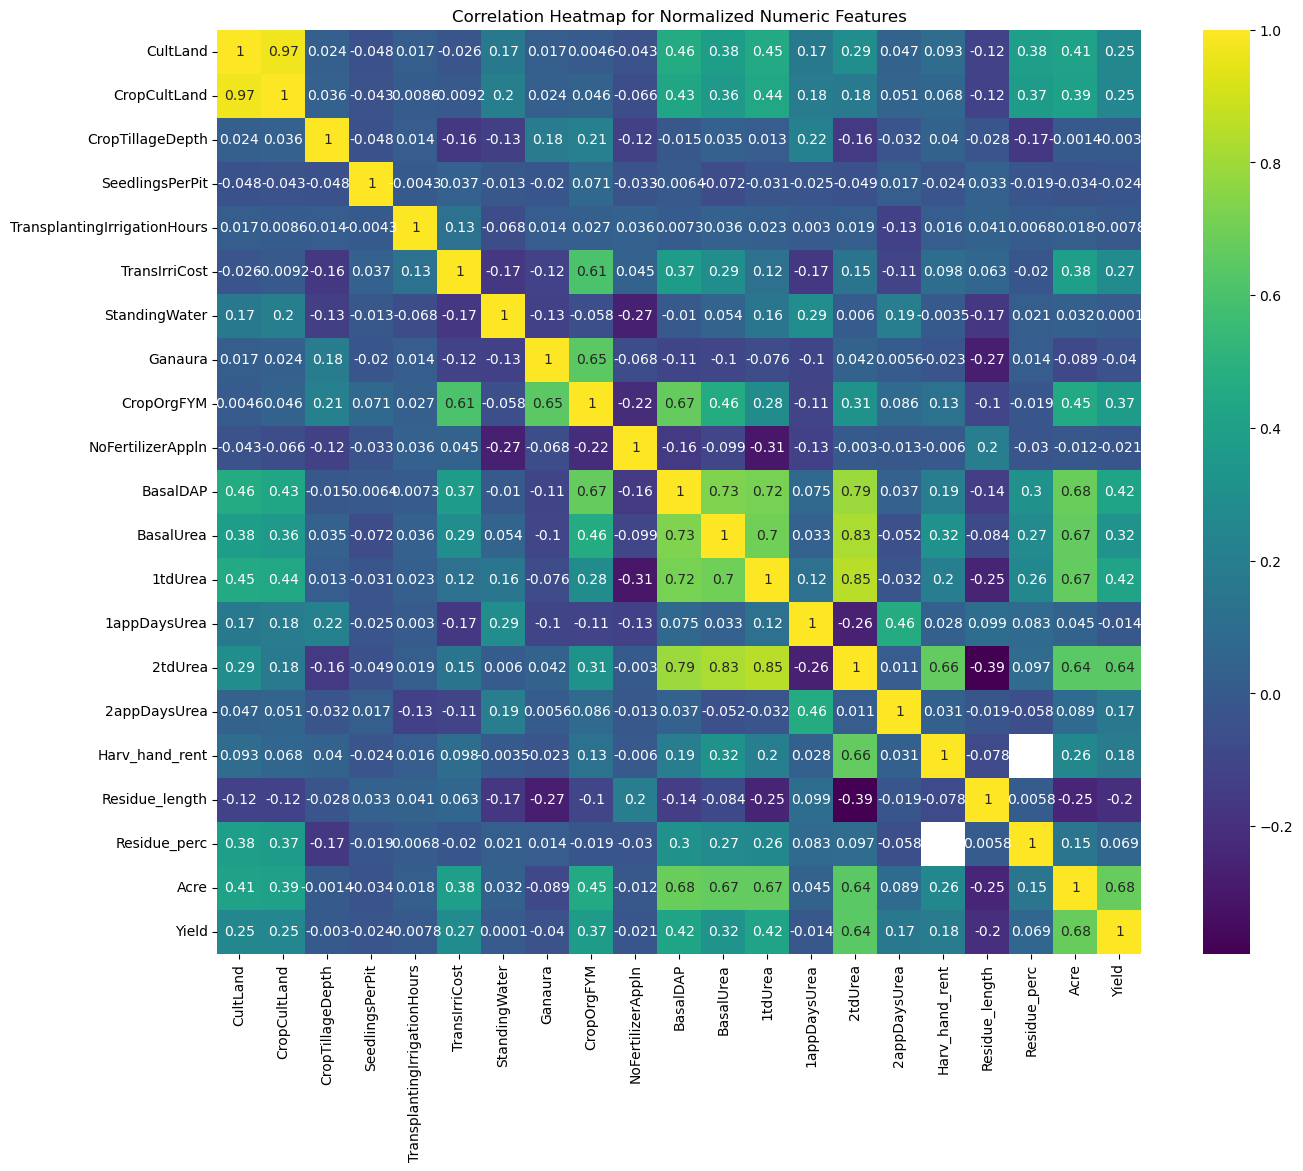

In [12]:
# Select and normalize only the numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_data)
normalized_df = pd.DataFrame(normalized_data, columns=numeric_data.columns)

# Compute the correlation matrix on normalized data
correlation_matrix = normalized_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', square=True)
plt.title("Correlation Heatmap for Normalized Numeric Features")
plt.show()

#####
There are no significant correlations between features except 'CultLand' and 'CropCultLand'.

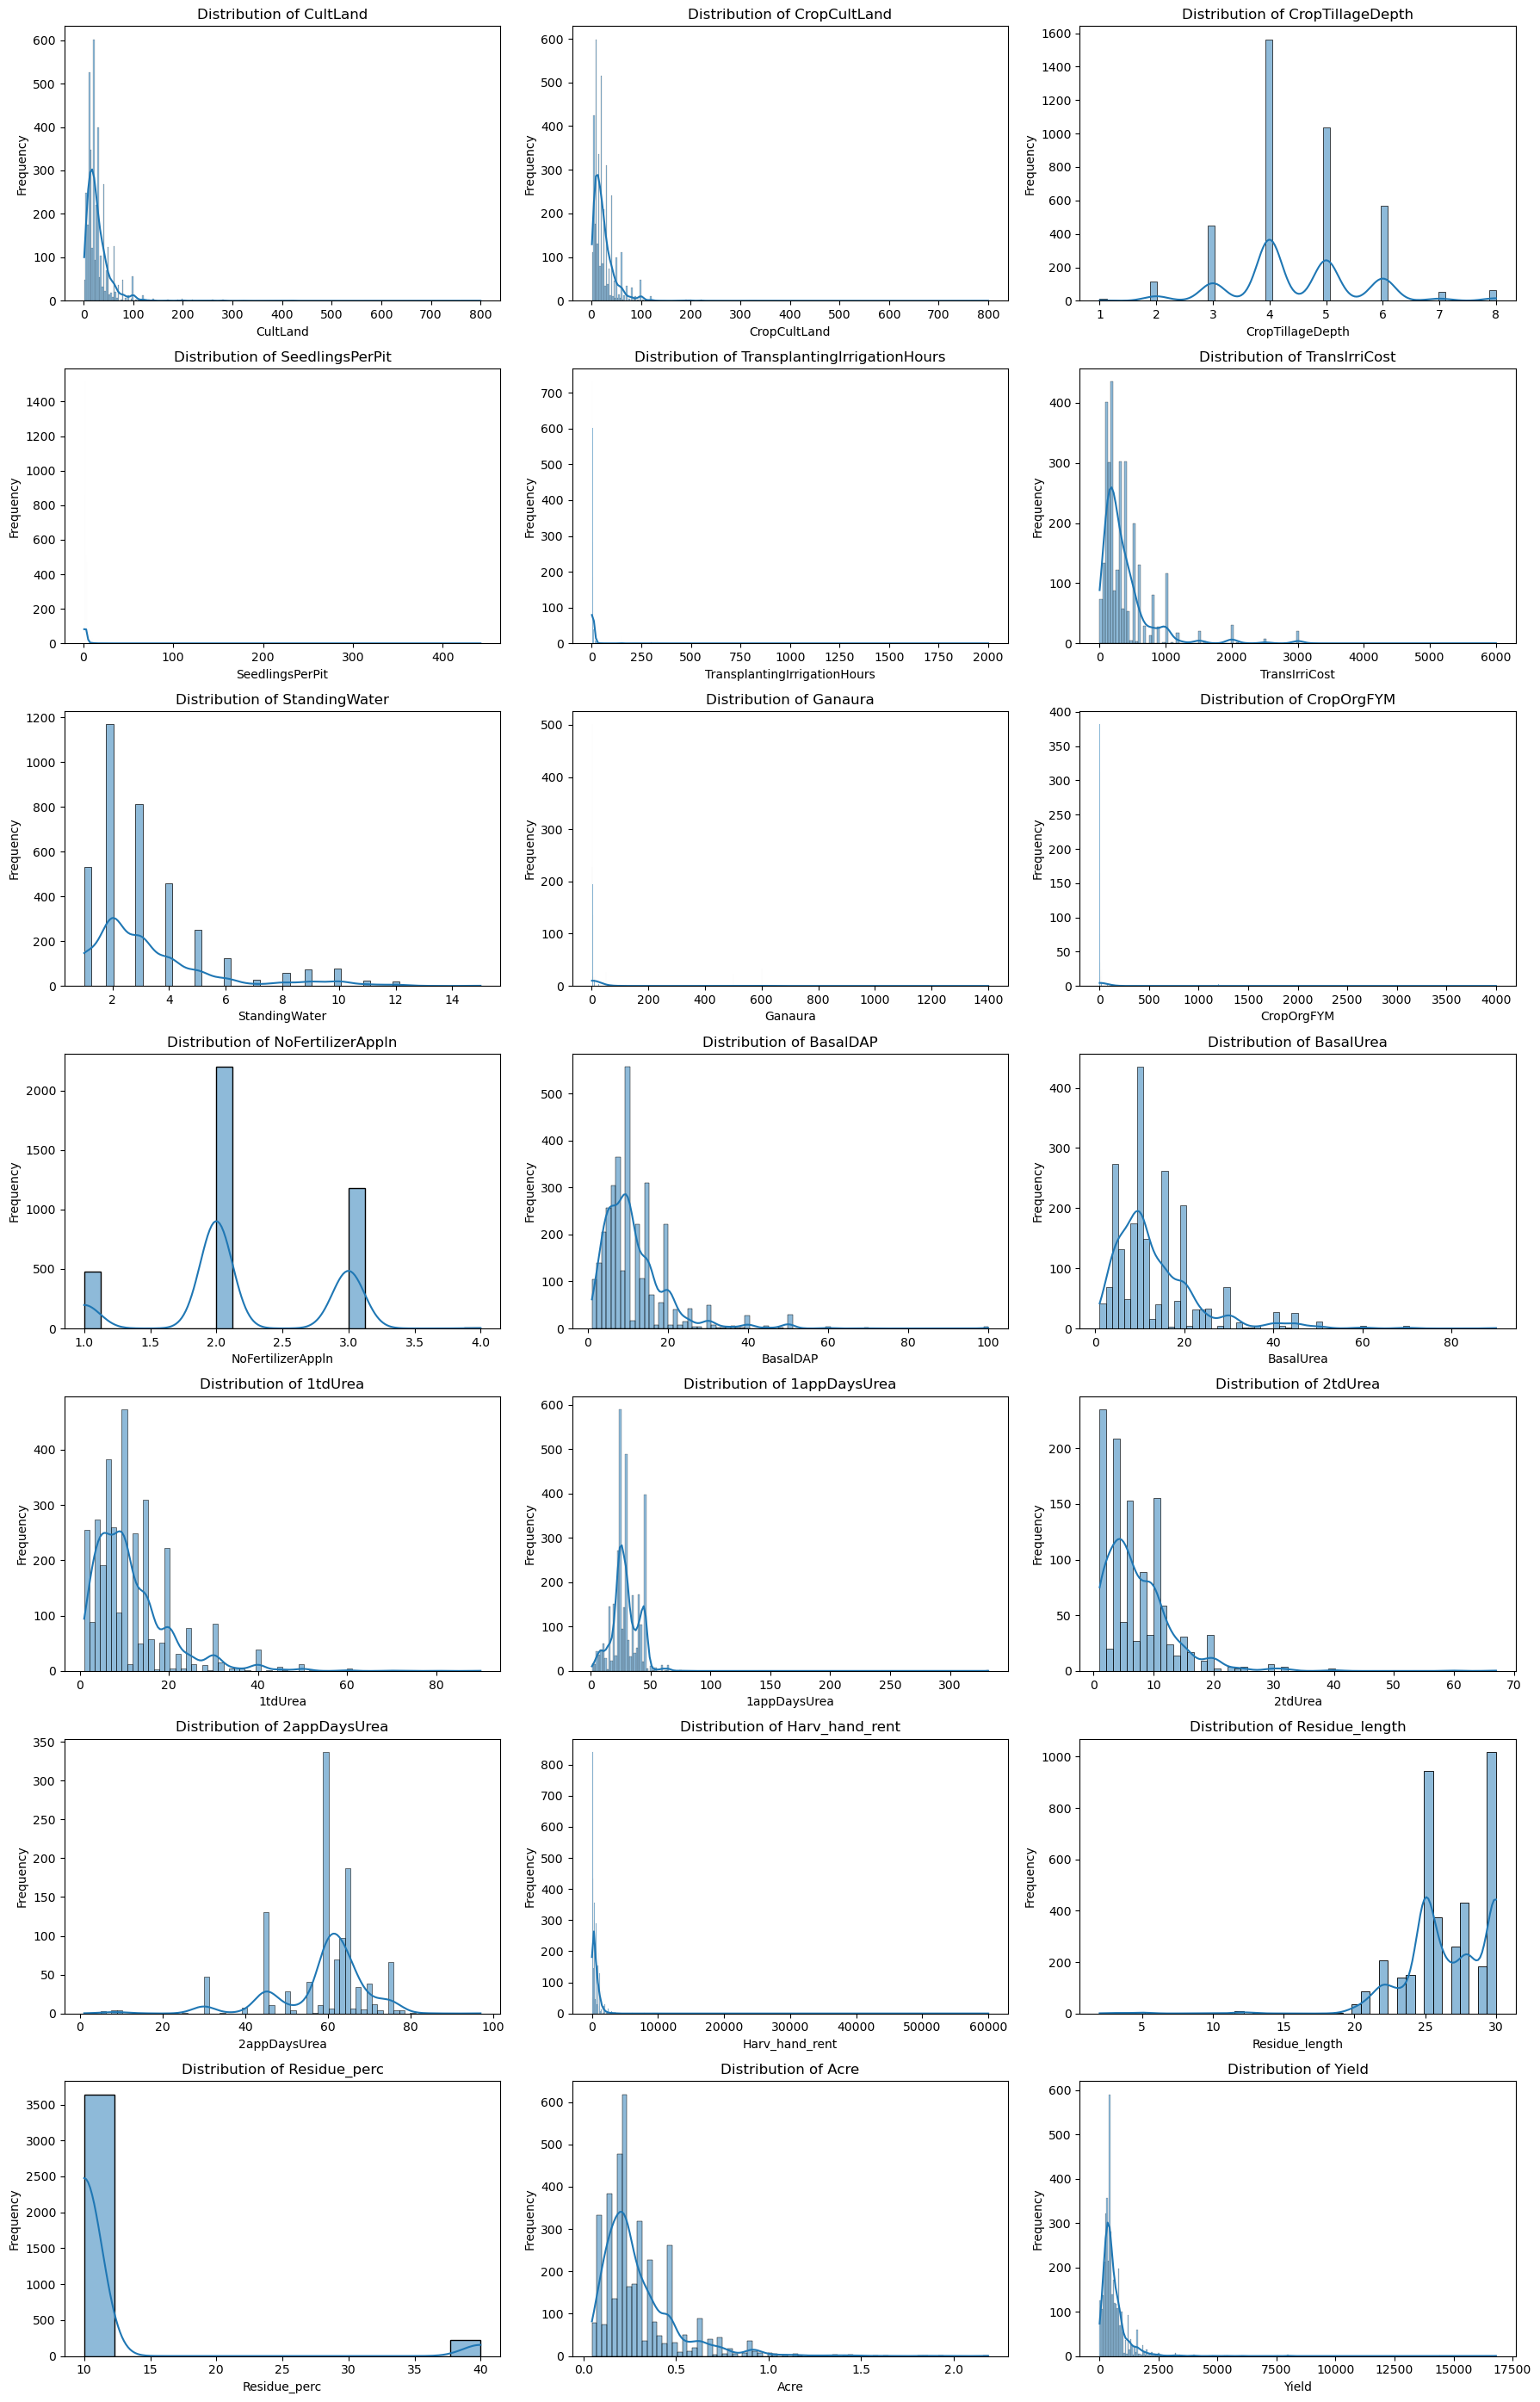

In [13]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up rows of 3 plots each
num_plots = len(numerical_columns)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 4))
axes = axes.flatten()

# Create histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any extra subplots
for j in range(i + 1, num_rows * 3):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [14]:
numerical_columns

Index(['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit',
       'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
       'Ganaura', 'CropOrgFYM', 'NoFertilizerAppln', 'BasalDAP', 'BasalUrea',
       '1tdUrea', '1appDaysUrea', '2tdUrea', '2appDaysUrea', 'Harv_hand_rent',
       'Residue_length', 'Residue_perc', 'Acre', 'Yield'],
      dtype='object')

####
Let's look closer at some of the features

In [15]:
# Calculate the 95th percentile for the 'Ganaura' column
q90 = df['Ganaura'].quantile(0.95)
print("95th Percentile (Upper Limit):", q90)

95th Percentile (Upper Limit): 80.0


In [16]:
# Ganaura, CropOrgFYM
df['CropOrgFYM'].quantile(0.95)

22.75

In [17]:
# Calculate the 95th percentile 
q95 = df['1appDaysUrea'].quantile(0.95)
print("95th Percentile (Upper Limit):", q95)

95th Percentile (Upper Limit): 45.0


In [18]:
q95 = df['TransplantingIrrigationHours'].quantile(0.95)
print("95th Percentile (Upper Limit):", q95)

95th Percentile (Upper Limit): 15.0


In [19]:
# Checking correlation between the two columns
correlation = df[['CropCultLand', 'Acre']].corr()
print(correlation)

              CropCultLand     Acre
CropCultLand       1.00000  0.39407
Acre               0.39407  1.00000


In [20]:
# Checking correlation between the two columns
correlation = df[['CultLand', 'Acre']].corr()
print(correlation)

          CultLand      Acre
CultLand  1.000000  0.409604
Acre      0.409604  1.000000


In [21]:
df['Yield'].quantile(0.90)

1200.0

In [22]:
df['Harv_hand_rent'].value_counts().sort_index()

Harv_hand_rent
1.0         1
2.0         2
3.0        11
4.0         4
5.0         7
           ..
6137.0      1
7221.0      1
7931.0      1
9300.0      2
60000.0     1
Name: count, Length: 131, dtype: int64

#### Let's inspect the number of fertilizer applications and their kind

In [23]:
df['NoFertilizerAppln'].value_counts()

NoFertilizerAppln
2    2201
3    1181
1     481
4       7
Name: count, dtype: int64

In [24]:
df[df['NoFertilizerAppln'] != 1][['FirstTopDressFert', '1tdUrea', '1appDaysUrea']]

,FirstTopDressFert,1tdUrea,1appDaysUrea
ID,,,
ID_GTFAC7PEVWQ9,Urea,15.0,18.0
ID_TK40ARLSPOKS,Urea,20.0,39.0
ID_1FJY2CRIMLZZ,Urea,5.0,65.0
ID_I3IPXS4DB7NE,Urea,5.0,5.0
ID_4T8YQWXWHB4A,Urea,30.0,26.0
...,...,...,...
ID_DU6AHQ06QMXV,Urea,9.0,23.0
ID_PW2LN7ACB8MM,Urea DAP,2.0,30.0
ID_7ZZQ6R4XB4FK,Urea,12.0,45.0


In [25]:
# Filter rows where 'FirstTopDressFert' does not contain "Urea" and 'NoFertilizerAppln' is not equal to 1
filtered_df = df[(~df['FirstTopDressFert'].str.contains("Urea", na=False)) & (df['NoFertilizerAppln'] != 1)][['FirstTopDressFert', '1tdUrea', '1appDaysUrea']]

# Display the filtered result
print(filtered_df)

                FirstTopDressFert  1tdUrea  1appDaysUrea
ID                                                      
ID_GRREKUJLG8N5               DAP      NaN           NaN
ID_RQ2X90R8F30U               DAP      NaN           NaN
ID_6VW9ED51TTXA               DAP      NaN           NaN
ID_6SNCEIE9GIKJ               DAP      NaN           NaN
ID_W53ULSZ3UZJK               DAP      NaN           NaN
...                           ...      ...           ...
ID_3KR27BO0615L          DAP NPKS      NaN           NaN
ID_USJIQ3L9ZQLD               DAP      NaN           NaN
ID_9II4YBSXYK4Q               DAP      NaN           NaN
ID_2KJP9DE2ZBIY               DAP      NaN           NaN
ID_8I7QB5U74AUJ               DAP      NaN           NaN

[75 rows x 3 columns]


In [26]:
df[df['NoFertilizerAppln']==3][['2tdUrea', '2appDaysUrea']]

,2tdUrea,2appDaysUrea
ID,,
ID_6O44Z25H1JAV,6.0,67.0
ID_6YA9Y09O55LE,7.0,58.0
ID_92OQSAHCN51N,12.0,65.0
ID_SJYVZSXJCX8S,1.0,60.0
ID_O99ZE30OJQ0E,1.0,60.0
...,...,...
ID_OQG31JUGU5JL,7.0,65.0
ID_RSC7O6MY665W,10.0,45.0
ID_DU6AHQ06QMXV,9.0,55.0


In [27]:
df[(df['NoFertilizerAppln'].isin([3, 4])) & (df['2tdUrea'].isna() | df['2appDaysUrea'].isna())][['2tdUrea', '2appDaysUrea']]

,2tdUrea,2appDaysUrea
ID,,
ID_X4024AVMS14D,6.0,NaN
ID_N1ELLJ1F32VU,NaN,NaN
ID_JI5NFWHR5G3H,4.0,NaN
ID_90IBO92HGZYD,5.0,NaN
ID_T5LYSK1D2TZX,NaN,NaN
ID_K9MMVQBHNSWY,NaN,NaN
ID_AXUCB1MQPA7Q,NaN,NaN
ID_Q5NRUPWTA5NX,3.0,NaN
ID_V7KHHGC42620,NaN,NaN


In [28]:
df[(df['2tdUrea'].isna() | df['2appDaysUrea'].isna())][['2tdUrea', '2appDaysUrea']]

,2tdUrea,2appDaysUrea
ID,,
ID_GTFAC7PEVWQ9,NaN,NaN
ID_TK40ARLSPOKS,NaN,NaN
ID_1FJY2CRIMLZZ,NaN,NaN
ID_I3IPXS4DB7NE,NaN,NaN
ID_4T8YQWXWHB4A,NaN,NaN
...,...,...
ID_NOASMX3TXXY9,NaN,NaN
ID_7ZZQ6R4XB4FK,NaN,NaN
ID_RBYVUPRATVMW,NaN,NaN


### Visualize Categorical Variables

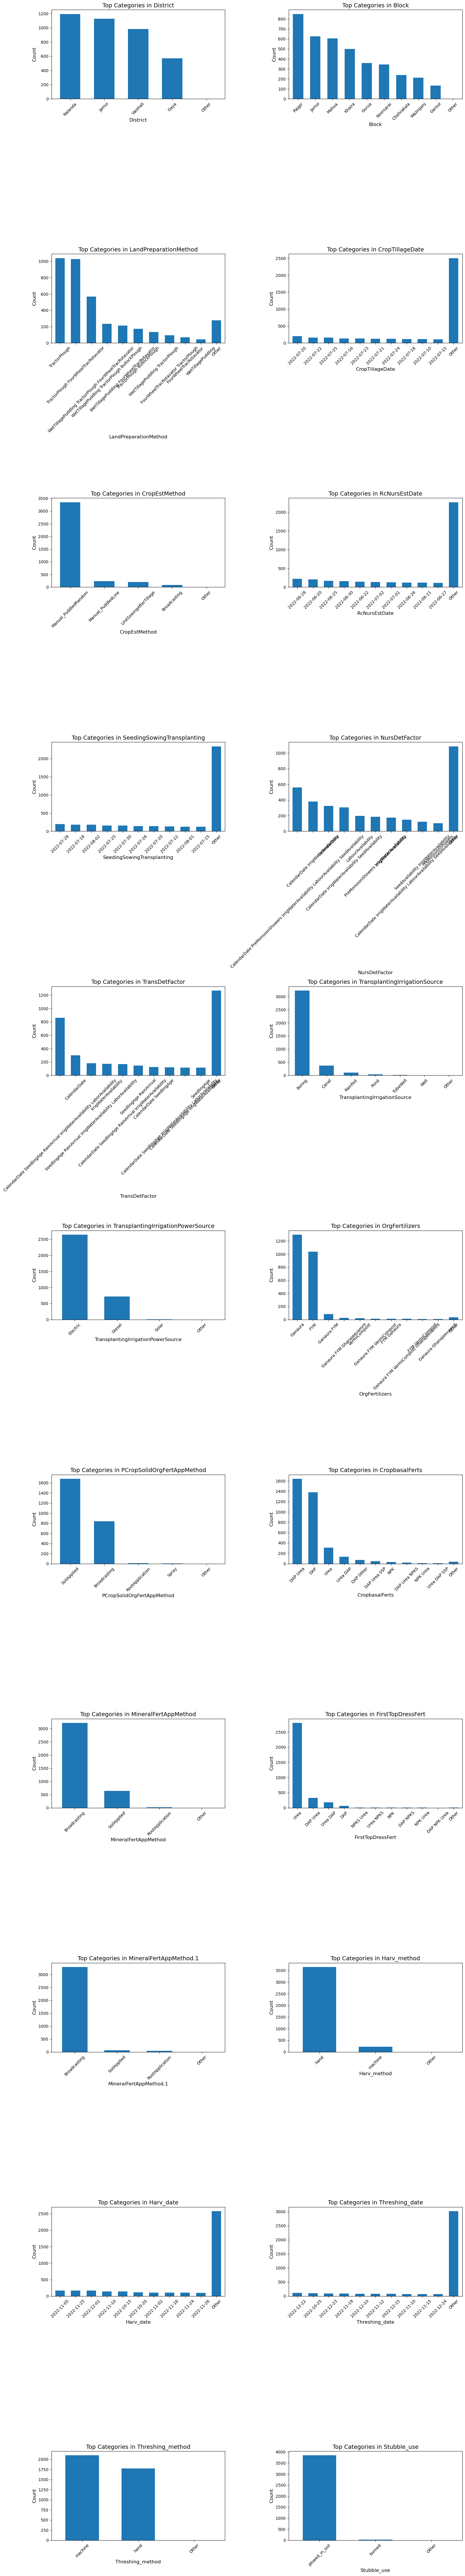

In [29]:
# Define the number of top categories to display (including "Other")
top_n = 10
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate rows and columns for the subplots grid
num_plots = len(categorical_columns)
num_rows = (num_plots // 2) + (num_plots % 2 > 0)  # Two plots per row
fig, axes = plt.subplots(num_rows, 2, figsize=(16, num_rows * 8))  # Adjust height per row for readability
axes = axes.flatten()

# Plot top categories with an "Other" category as the 11th bar
for i, col in enumerate(categorical_columns):
    # Get the top N categories
    top_categories = df[col].value_counts().nlargest(top_n)
    
    # Calculate "Other" as the sum of all categories outside the top N
    other_count = df[col].value_counts()[top_n:].sum()
    top_categories['Other'] = other_count  # Add "Other" category as the 11th entry

    # Plot
    top_categories.plot(kind='bar', ax=axes[i], width=0.6)  # Adjust width for readability
    axes[i].set_title(f'Top Categories in {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Hide any extra subplots if fewer than 2 plots in the last row
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


### Visualize date columns

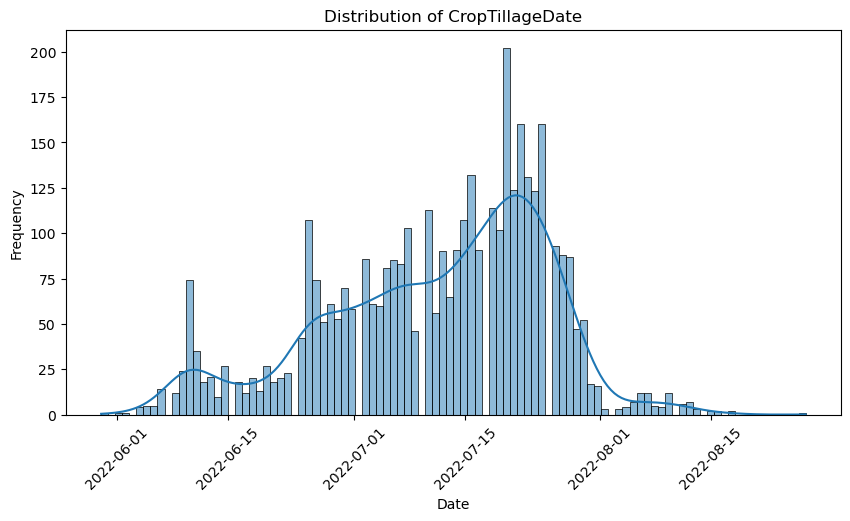

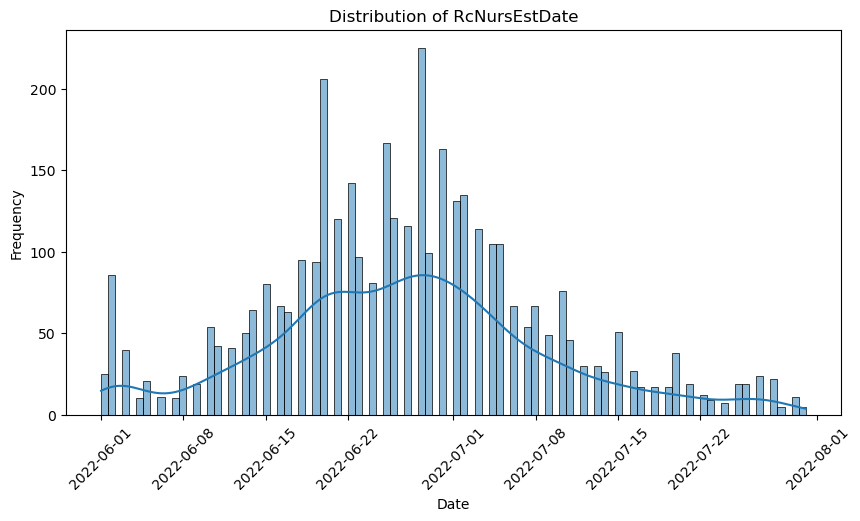

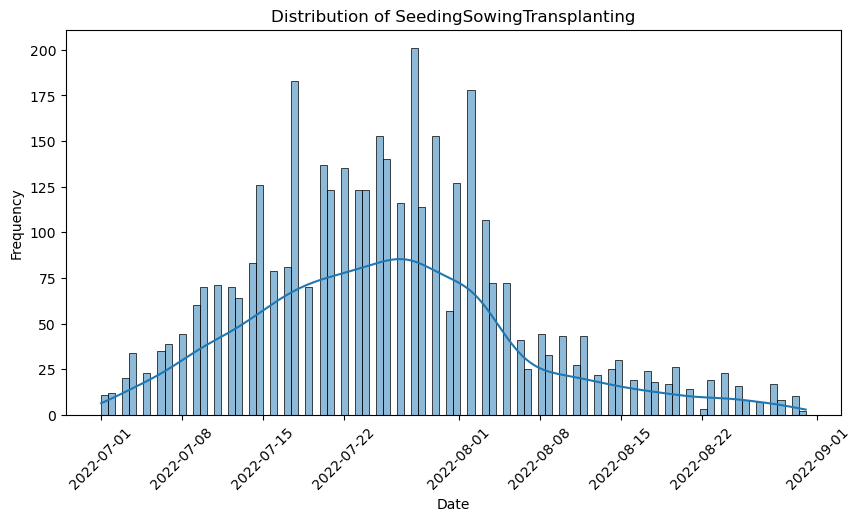

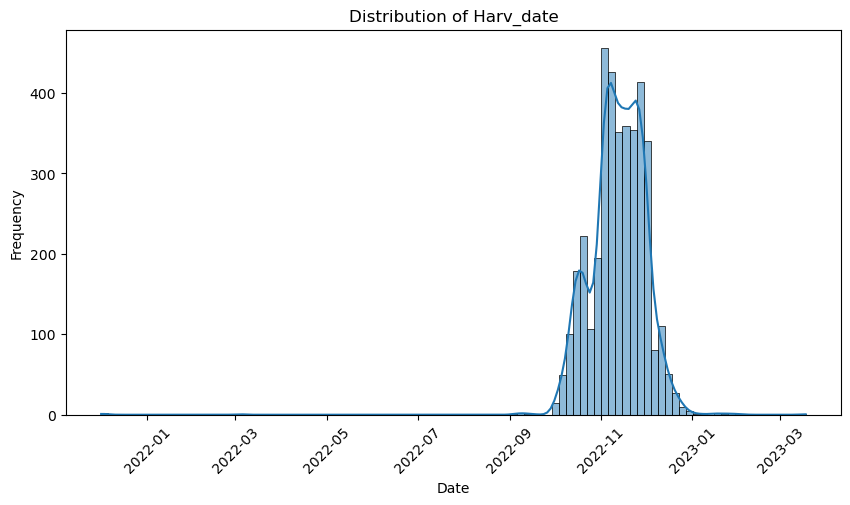

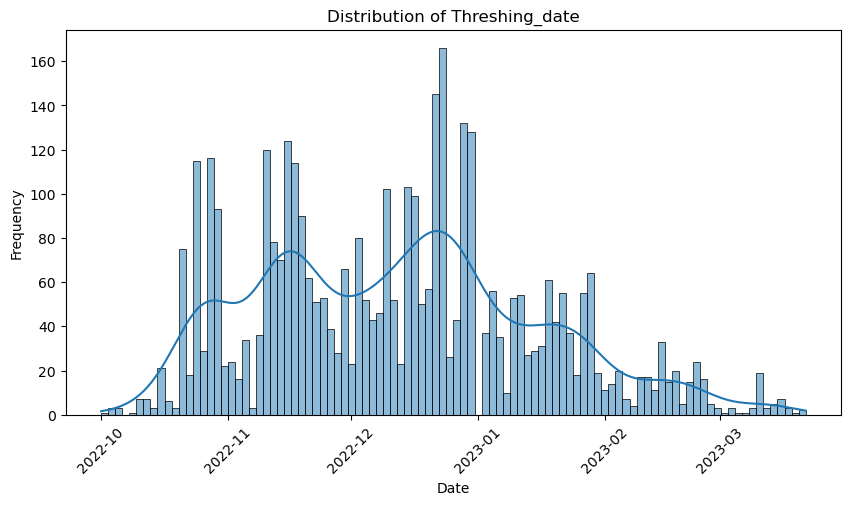

In [30]:
# List of date columns
date_columns = ['CropTillageDate', 'RcNursEstDate', 'SeedingSowingTransplanting', 'Harv_date', 'Threshing_date']

# Temporarily convert date columns to datetime format
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Plot the distribution of each date column
for col in date_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col].dropna(), bins=100, kde=True)  # Use KDE to see the distribution curve
    plt.title(f'Distribution of {col}')
    plt.xlabel('Date')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

In [31]:
# Filter rows where 'Harv_date' is before October 1, 2022
df[df['Harv_date'] < '2022-09-01']

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ID_9P3DV08LL3SX,Jamui,Khaira,50,32,TractorPlough,2022-07-19,4,Manual_PuddledRandom,2022-06-28,2022-07-26,1.0,PreMonsoonShowers,CalendarDate SeedlingAge RainArrival LaborAvai...,6.0,Boring,Electric,300.0,3.0,Ganaura,3.0,NaN,SoilApplied,3,DAP,20.0,NaN,Broadcasting,Urea,28.0,21.0,25.0,60.0,Broadcasting,hand,2021-12-01,1600.0,2022-12-19,hand,25,10,plowed_in_soil,0.909091,1900
ID_YTZN9FE7PQUY,Nalanda,Rajgir,30,30,TractorPlough,2022-06-09,6,Manual_PuddledRandom,2022-06-09,2022-07-09,1.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,23.0,Boring,Electric,100.0,2.0,Ganaura,500.0,NaN,Broadcasting,2,DAP Urea,6.0,6.0,Broadcasting,Urea,6.0,23.0,NaN,NaN,Broadcasting,hand,2022-03-04,325.0,2022-11-08,hand,22,10,plowed_in_soil,0.156250,300
ID_RL2F5BMVBUAX,Jamui,Khaira,22,16,TractorPlough,2022-07-25,4,Manual_PuddledRandom,2022-07-06,2022-08-04,1.0,LabourAvailability,SeedlingAge RainArrival IrrigWaterAvailability...,2.0,Boring,Diesel,250.0,2.0,FYM,NaN,2.0,SoilApplied,3,DAP,9.0,NaN,Broadcasting,Urea,6.0,23.0,9.0,69.0,Broadcasting,hand,2021-12-03,700.0,2022-12-23,hand,23,10,plowed_in_soil,0.363636,900


In [32]:
df[df['Harv_date'] > '2023-01-01']

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ID_PX8CNYP9YHPE,Vaishali,Chehrakala,8,6,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-07-10,2022-08-05,1.0,IrrigWaterAvailability,RainArrival,5.0,Boring,Diesel,1000.0,2.0,VermiCompost,NaN,NaN,SoilApplied,2,DAP,8.0,NaN,Broadcasting,DAP,NaN,NaN,NaN,NaN,Broadcasting,hand,2023-02-02,150.0,2023-02-26,machine,25,10,plowed_in_soil,0.227273,500
ID_PATK559888IV,Gaya,Gurua,30,30,TractorPlough FourWheelTracRotavator,2022-08-03,6,Manual_PuddledLine,2022-06-20,2022-08-09,2.0,IrrigWaterAvailability SeedAvailability,IrrigWaterAvailability LaborAvailability,5.0,Boring,Electric,100.0,5.0,Ganaura FYM,50.0,1.0,SoilApplied,2,DAP,5.0,NaN,RootApplication,Urea,5.0,36.0,NaN,NaN,Broadcasting,hand,2023-01-10,600.0,2023-01-18,machine,30,10,plowed_in_soil,0.185185,425
ID_ZAQF5TZH58PX,Nalanda,Rajgir,56,42,TractorPlough FourWheelTracRotavator,2022-07-14,2,Broadcasting,NaT,2022-07-15,NaN,NaN,NaN,4.0,Boring,Electric,NaN,3.0,FYM,NaN,9.0,SoilApplied,3,DAP Urea SSP,4.0,4.0,Broadcasting,DAP Urea,4.0,28.0,4.0,60.0,Broadcasting,hand,2023-01-05,100.0,2023-01-13,hand,26,10,plowed_in_soil,0.125000,320
ID_J7PL485NOPNC,Nalanda,Rajgir,38,28,TractorPlough FourWheelTracRotavator,2022-07-11,2,Broadcasting,NaT,2022-07-20,NaN,NaN,NaN,6.0,Boring,Electric,NaN,4.0,FYM,NaN,20.0,SoilApplied,3,DAP Urea SSP,10.0,10.0,SoilApplied,Urea DAP,10.0,29.0,12.0,56.0,Broadcasting,machine,2023-03-18,NaN,2023-03-20,machine,23,40,plowed_in_soil,0.312500,832
ID_X2XPIRO6ZYMC,Nalanda,Rajgir,42,32,TractorPlough FourWheelTracRotavator,2022-07-10,2,Broadcasting,NaT,2022-07-19,NaN,NaN,NaN,5.0,Boring,Electric,NaN,3.0,FYM,NaN,10.0,Broadcasting,3,DAP Urea SSP,6.0,5.0,Broadcasting,Urea DAP,5.0,32.0,6.0,63.0,Broadcasting,hand,2023-01-17,100.0,2023-01-20,machine,26,10,plowed_in_soil,0.156250,402
ID_WIXJZSB1JPAA,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-07-21,6,LineSowingAfterTillage,2022-06-20,2022-08-21,NaN,NaN,NaN,5.0,Boring,Electric,300.0,3.0,Ganaura Ghanajeevamrit FYM,1.0,1.0,Broadcasting,2,DAP,5.0,NaN,Broadcasting,Urea,5.0,5.0,NaN,NaN,Broadcasting,hand,2023-01-17,600.0,2023-01-28,machine,30,10,plowed_in_soil,0.185185,275
ID_RCQBDGSCHLXV,Jamui,Jamui,10,10,TractorPlough,2022-07-21,4,Manual_PuddledRandom,2022-06-27,2022-07-22,11.0,PreMonsoonShowers IrrigWaterAvailability,RainArrival SeedlingAge,5.0,Boring,Electric,500.0,2.0,NaN,NaN,NaN,NaN,1,DAP Urea,11.0,11.0,Broadcasting,NaN,NaN,NaN,NaN,NaN,NaN,hand,2023-01-21,480.0,2023-01-23,machine,25,10,plowed_in_soil,0.272727,470
ID_Z0CHG2VQSJ31,Jamui,Jamui,20,20,TractorPlough BullockPlough,2022-07-30,4,Manual_PuddledRandom,2022-06-19,2022-08-02,4.0,CalendarDate IrrigWaterAvailability,CalendarDate SeedlingAge,5.0,Boring,Electric,1000.0,3.0,Ganaura,6.0,NaN,Broadcasting,3,NaN,NaN,NaN,Broadcasting,Urea DAP,2.0,30.0,1.0,60.0,Broadcasting,hand,2023-01-26,90.0,2023-01-27,hand,29,10,plowed_in_soil,0.454545,800
ID_2KJP9DE2ZBIY,Jamui,Jamui,18,5,WetTillagePuddling TractorPlough BullockPlough,2022-06-30,3,Manual_PuddledRandom,2022-07-13,2022-08-02,3.0,CalendarDate,CalendarDate,10.0,Boring,Electric,3000.0,1.0,Ganaura,4.0,NaN,Broadcasting,2,DAP Urea,10.0,10.0,Broadcasting,DAP,NaN,NaN,NaN,NaN,Broadcasting,hand,2023-01-27,200.0,2023-01-27,machine,26,10,plowed_in_soil,0.227273,400


In [33]:
# Revert to original format if needed (optional)
for col in date_columns:
    df[col] = df[col].astype(str)  # Convert back to string if needed

### THE END

##### The rest of this notebook is failed model exploration.  
***********************************************************


## Preprocessing

#### Split data into training and testing

In [302]:
# Drop the index column 
df = df.reset_index(drop=True)

X = df.drop('Yield', axis=1)  # Features
y = df['Yield']               # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [303]:
y_test.head()

2176     650
1421     560
2480     400
1586     500
952     1650
Name: Yield, dtype: int64

In [304]:
# Define a ColumnTransformer to drop 'CultLand' (highly correlated with 'CropCultLand')
drop_transformer = ColumnTransformer(
    transformers=[
        ('drop_cultland', 'drop', ['CultLand'])  # Drops the 'CultLand' column
    ],
    remainder='passthrough'  # Keeps all other columns
)

In [305]:
# Adjust y directly to represent Yield per Acre
y_train = y_train / X_train['Acre']
y_test = y_test / X_test['Acre']

In [306]:
# Dates
class DateFeatureExtractorWithScaling(BaseEstimator, TransformerMixin):
    def __init__(self, date_columns, column_to_impute_median=None):
        self.date_columns = date_columns
        self.column_to_impute_median = column_to_impute_median
        self.median_date = None
        self.scaler = StandardScaler()  # Initialize the scaler

    def fit(self, X, y=None):
        # Calculate the median date for the specified column
        if self.column_to_impute_median:
            self.median_date = pd.to_datetime(X[self.column_to_impute_median], errors='coerce').median()
        
        # Fit the scaler on month and day columns after extracting them temporarily
        temp_X = self.transform(X.copy(), scale=False)  # Extract features without scaling
        self.scaler.fit(temp_X.filter(regex='_(month|day)$'))  # Fit scaler on day and month columns
        return self

    def transform(self, X, scale=True):
        # Work on a copy of X to avoid modifying the original data
        X = X.copy()
        
        # Impute the specified date column with the median date if applicable
        if self.column_to_impute_median and self.median_date is not None:
            X[self.column_to_impute_median] = pd.to_datetime(X[self.column_to_impute_median], errors='coerce').fillna(self.median_date)
        
        # Loop through each date column to convert and extract features
        for col in self.date_columns:
            # Ensure the column is in datetime format
            X[col] = pd.to_datetime(X[col], errors='coerce')
            
            # Extract month and day components
            X[f'{col}_month'] = X[col].dt.month
            X[f'{col}_day'] = X[col].dt.day
        
        # Drop the original date columns
        X = X.drop(columns=self.date_columns)
        
        # Apply scaling to the extracted month and day columns
        if scale:
            month_day_columns = X.filter(regex='_(month|day)$').columns
            X[month_day_columns] = self.scaler.transform(X[month_day_columns])
        
        return X

# Instantiate the custom transformer with median imputation for 'RcNursEstDate' and scaling
date_feature_extractor = DateFeatureExtractorWithScaling(
    date_columns=['CropTillageDate', 'RcNursEstDate', 'SeedingSowingTransplanting', 'Harv_date', 'Threshing_date'],
    column_to_impute_median='RcNursEstDate'
)

In [307]:
# class DateFeatureExtractorWithScaling(BaseEstimator, TransformerMixin):
#     def __init__(self, date_columns, column_to_impute_median=None):
#         self.date_columns = date_columns
#         self.column_to_impute_median = column_to_impute_median
#         self.median_date = None
#         self.scaler = StandardScaler()  # Initialize the scaler

#     def fit(self, X, y=None):
#         # Ensure X is a DataFrame
#         if not isinstance(X, pd.DataFrame):
#             print("Converting X to DataFrame in fit")
#             X = pd.DataFrame(X)

#         # Calculate the median date for the specified column
#         if self.column_to_impute_median:
#             self.median_date = pd.to_datetime(X[self.column_to_impute_median], errors='coerce').median()
        
#         # Extract month and day columns and fit scaler
#         temp_X = self.transform(X.copy(), scale=False)  # Extract features without scaling
#         self.scaler.fit(temp_X.filter(regex='_(month|day)$'))  # Fit scaler on day and month columns
#         return self

#     def transform(self, X, scale=True):
#         # Ensure X is a DataFrame
#         if not isinstance(X, pd.DataFrame):
#             print("Converting X to DataFrame in transform")
#             X = pd.DataFrame(X)

#         X = X.copy()  # Work on a copy of X
        
#         # Impute the specified date column with the median date if applicable
#         if self.column_to_impute_median and self.median_date is not None:
#             X[self.column_to_impute_median] = pd.to_datetime(X[self.column_to_impute_median], errors='coerce').fillna(self.median_date)
        
#         # Extract month and day components for each date column
#         for col in self.date_columns:
#             X[col] = pd.to_datetime(X[col], errors='coerce')
#             X[f'{col}_month'] = X[col].dt.month
#             X[f'{col}_day'] = X[col].dt.day
        
#         # Drop original date columns
#         X = X.drop(columns=self.date_columns)
        
#         # Apply scaling to the extracted month and day columns
#         if scale:
#             month_day_columns = X.filter(regex='_(month|day)$').columns
#             X[month_day_columns] = self.scaler.transform(X[month_day_columns])
        
#         print("Transform output columns:", X.columns)
#         return X

# # Instantiate and integrate into the pipeline
# date_feature_extractor = DateFeatureExtractorWithScaling(
#     date_columns=['CropTillageDate', 'RcNursEstDate', 'SeedingSowingTransplanting', 'Harv_date', 'Threshing_date'],
#     column_to_impute_median='RcNursEstDate'
# )


In [308]:
# Custom Transformer for Imputation with the median and Capping Outliers
# Fill missing values with the median, cap values at 95 percentile to avoid outliers

# Define the columns for each transformation
columns_to_impute_and_cap = ['SeedlingsPerPit', 'TransplantingIrrigationHours']
columns_to_impute_only = ['StandingWater', 'BasalDAP', 'BasalUrea', 'Harv_hand_rent', 'TransIrriCost'] # impute with median
columns_to_impute_with_zero_and_cap = ['Ganaura', 'CropOrgFYM']


class ImputeAndCapOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_impute_and_cap, columns_to_impute_only, columns_to_impute_with_zero_and_cap):
        self.columns_to_impute_and_cap = columns_to_impute_and_cap
        self.columns_to_impute_only = columns_to_impute_only
        self.columns_to_impute_with_zero_and_cap = columns_to_impute_with_zero_and_cap
        self.medians = {}
        self.percentile_95 = {}

    def fit(self, X, y=None):
        # Calculate the median and 95th percentile for each column to impute and cap
        for col in self.columns_to_impute_and_cap:
            self.medians[col] = X[col].median()
            self.percentile_95[col] = X[col].quantile(0.95)
        
        # Calculate the median for each column to impute only
        for col in self.columns_to_impute_only:
            self.medians[col] = X[col].median()
        
        # Calculate the 95th percentile for columns to impute with zero and cap
        for col in self.columns_to_impute_with_zero_and_cap:
            self.percentile_95[col] = X[col].quantile(0.95)
        
        return self

    def transform(self, X):
        # Work on a copy of X to avoid modifying the original data
        X = X.copy()
        
        # Impute and cap outliers for specified columns
        for col in self.columns_to_impute_and_cap:
            # Impute missing values with the median
            X[col] = X[col].fillna(self.medians[col])
            # Cap values above the 95th percentile
            X[col] = np.where(X[col] > self.percentile_95[col], self.percentile_95[col], X[col])
        
        # Impute only with median for each specified column in columns_to_impute_only
        for col in self.columns_to_impute_only:
            X[col] = X[col].fillna(self.medians[col])
        
        # Impute with zero and cap values for the specified columns
        for col in self.columns_to_impute_with_zero_and_cap:
            X[col] = X[col].fillna(0)
            X[col] = np.where(X[col] > self.percentile_95[col], self.percentile_95[col], X[col])
        
        return X

In [309]:
# Specify the columns to impute and cap
cap_column = '1appDaysUrea'
impute_zero_column = '1tdUrea'

class ImputeAndCapSpecificColumns(BaseEstimator, TransformerMixin):
    def __init__(self, cap_column, impute_zero_column):
        self.cap_column = cap_column
        self.impute_zero_column = impute_zero_column
        self.percentile_95 = {}

    def fit(self, X, y=None):
        # Calculate the 95th percentile for the specified column to cap
        self.percentile_95[self.cap_column] = X[self.cap_column].quantile(0.95)
        return self

    def transform(self, X):
        X = X.copy()
        # Impute missing values in `impute_zero_column` with 0
        X[self.impute_zero_column] = X[self.impute_zero_column].fillna(0)
        # Impute missing values in `cap_column` with 0 and cap at 95th percentile
        X[self.cap_column] = X[self.cap_column].fillna(0)
        X[self.cap_column] = np.where(X[self.cap_column] > self.percentile_95[self.cap_column], 
                                      self.percentile_95[self.cap_column], 
                                      X[self.cap_column])
        return X


In [310]:
# if NoFertilizerAppln equals 3 or 4 and there is a value for 2tdUrea, replace 2appDaysUrea with the median. 
# otherwise, replace missing values for 2tdUrea and 2appDaysUrea with 0

class ConditionalImputeUrea(BaseEstimator, TransformerMixin):
    def __init__(self, columns, condition_column, condition_values):
        self.columns = columns
        self.condition_column = condition_column
        self.condition_values = condition_values
        self.median_values = {}

    def fit(self, X, y=None):
        # Calculate the median for each column to be used for conditional imputation
        for col in self.columns:
            self.median_values[col] = X[col].median()
        return self

    def transform(self, X):
        X = X.copy()
        
        # Apply conditional imputation
        for col in self.columns:
            if col == '2appDaysUrea':
                # Condition for NoFertilizerAppln in specified values and 2tdUrea is not missing
                condition = (X[self.condition_column].isin(self.condition_values)) & (X['2tdUrea'].notna())
                # Impute missing values in 2appDaysUrea with median if condition is met
                X.loc[condition & X['2appDaysUrea'].isna(), '2appDaysUrea'] = self.median_values['2appDaysUrea']
            
            # For cases not meeting the condition, replace missing values with 0
            X[col] = X[col].fillna(0)
        
        return X

# Define columns and conditions for the custom transformer
columns_to_impute = ['2tdUrea', '2appDaysUrea']
condition_column = 'NoFertilizerAppln'
condition_values = [3, 4]

# Instantiate the custom transformer
conditional_impute_urea = ConditionalImputeUrea(
    columns=columns_to_impute,
    condition_column=condition_column,
    condition_values=condition_values
)

In [311]:
# Define the columns where missing values should be replaced with 'Unknown'
columns_to_impute_with_unknown = ['NursDetFactor', 'TransDetFactor', 'TransplantingIrrigationSource', 
                                  'TransplantingIrrigationPowerSource',
                                  'OrgFertilizers', 'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 
                                  'FirstTopDressFert', 'MineralFertAppMethod.1']

# Define the custom transformer for filling missing values with 'Unknown'
class FillMissingWithUnknown(BaseEstimator, TransformerMixin):
    def __init__(self, columns, fill_value='Unknown'):
        self.columns = columns
        self.fill_value = fill_value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = X[col].fillna(self.fill_value)
        return X

In [312]:
# Let's create a binary (0/1) indicator column for each unique value

# usage in a pipeline for multiple columns
columns_to_binarize = ['LandPreparationMethod', 'NursDetFactor', 'TransDetFactor', 'OrgFertilizers',
                       'CropbasalFerts', 'FirstTopDressFert']  

class MultiColumnMultiLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.unique_labels = {}

    def fit(self, X, y=None):
        # Extract unique labels for each specified column
        for col in self.columns:
            all_labels = X[col].dropna().apply(lambda x: x.split()).sum()
            self.unique_labels[col] = list(set(all_labels))  # Get distinct labels per column
        return self

    def transform(self, X):
        # Work on a copy of X to avoid modifying the original data
        X = X.copy()
        for col in self.columns:
            for label in self.unique_labels[col]:
                # Create a new column for each unique label
                X[f"{col}_{label}"] = X[col].apply(lambda x: 1 if pd.notna(x) and label in x.split() else 0)
            
            # Drop the original column if desired
            X = X.drop(columns=[col])
        return X

In [313]:
# One Hot Encoding for the remaining categorical columns

# Define the exact list of categorical columns to one-hot encode
categorical_columns = [
    'District', 'Block', 'CropEstMethod', 'TransplantingIrrigationSource', 
    'TransplantingIrrigationPowerSource', 'PCropSolidOrgFertAppMethod', 
    'MineralFertAppMethod', 'MineralFertAppMethod.1', 'Harv_method', 
    'Threshing_method', 'Stubble_use'
]


# OneHotEncoder with ColumnTransformer for the specified columns
# SCALING remaining numeric columns

# Custom selector for continuous features based on the data range
# def continuous_column_selector(X):
#     """Select columns for scaling: continuous columns (e.g., float64 or wider range)"""
#     return [col for col in X_train.select_dtypes(include=['float64', 'int64']).columns if X[col].nunique() > 2]  # assuming binary features have <= 2 unique values


def continuous_column_selector(X):
    """Select columns for scaling: considers continuous columns with a wider range or more diverse values."""
    continuous_columns = []
    for col in X.select_dtypes(include=['float64', 'int64']).columns:
        unique_values = X[col].unique()
        # Residue_perc column has only two values: 10.0 or 40.0
        # Only consider continuous if it has more than 2 unique values or if the range is greater than a small tolerance
        if len(unique_values) > 2 or (len(unique_values) == 2 and abs(unique_values.max() - unique_values.min()) > 5):
            continuous_columns.append(col)
    return continuous_columns



one_hot_preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), make_column_selector(dtype_include='object')),
        ('scaler', StandardScaler(), continuous_column_selector(X))
    ],
    remainder='passthrough',  # Keep all other columns as is
    force_int_remainder_cols=False  # Use column names for remainder columns, suppresses the warning
)

In [314]:
# remaining numeric columns
X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

['CultLand',
 'CropCultLand',
 'CropTillageDepth',
 'SeedlingsPerPit',
 'TransplantingIrrigationHours',
 'TransIrriCost',
 'StandingWater',
 'Ganaura',
 'CropOrgFYM',
 'NoFertilizerAppln',
 'BasalDAP',
 'BasalUrea',
 '1tdUrea',
 '1appDaysUrea',
 '2tdUrea',
 '2appDaysUrea',
 'Harv_hand_rent',
 'Residue_length',
 'Residue_perc',
 'Acre']

In [315]:
X.columns

Index(['District', 'Block', 'CultLand', 'CropCultLand',
       'LandPreparationMethod', 'CropTillageDate', 'CropTillageDepth',
       'CropEstMethod', 'RcNursEstDate', 'SeedingSowingTransplanting',
       'SeedlingsPerPit', 'NursDetFactor', 'TransDetFactor',
       'TransplantingIrrigationHours', 'TransplantingIrrigationSource',
       'TransplantingIrrigationPowerSource', 'TransIrriCost', 'StandingWater',
       'OrgFertilizers', 'Ganaura', 'CropOrgFYM', 'PCropSolidOrgFertAppMethod',
       'NoFertilizerAppln', 'CropbasalFerts', 'BasalDAP', 'BasalUrea',
       'MineralFertAppMethod', 'FirstTopDressFert', '1tdUrea', '1appDaysUrea',
       '2tdUrea', '2appDaysUrea', 'MineralFertAppMethod.1', 'Harv_method',
       'Harv_date', 'Harv_hand_rent', 'Threshing_date', 'Threshing_method',
       'Residue_length', 'Residue_perc', 'Stubble_use', 'Acre'],
      dtype='object')

In [316]:
X_train.select_dtypes(include=['float64', 'int64']).columns

Index(['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit',
       'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
       'Ganaura', 'CropOrgFYM', 'NoFertilizerAppln', 'BasalDAP', 'BasalUrea',
       '1tdUrea', '1appDaysUrea', '2tdUrea', '2appDaysUrea', 'Harv_hand_rent',
       'Residue_length', 'Residue_perc', 'Acre'],
      dtype='object')

## Pipeline

In [317]:
# # Manually apply drop_transformer to X_train
# X_train_dropped = drop_transformer.transform(X_train)

# # Convert back to DataFrame if you want to see the columns and use DataFrame methods
# X_train_dropped_df = pd.DataFrame(X_train_dropped, columns=[col for col in X_train.columns if col != 'CultLand'])
# X_train_dropped_df.head()

In [333]:
# Define the main pipeline for preprocessing and modeling
pipeline_x = Pipeline([
#    ('drop_cultland', drop_transformer),
    ('date_feature_extractor', date_feature_extractor),
    ('impute_and_cap_outliers', ImputeAndCapOutliers(
        columns_to_impute_and_cap=columns_to_impute_and_cap,
        columns_to_impute_only=columns_to_impute_only,
        columns_to_impute_with_zero_and_cap=columns_to_impute_with_zero_and_cap
    )),
    ('impute_and_cap_specific_columns', ImputeAndCapSpecificColumns(
        cap_column=cap_column,
        impute_zero_column=impute_zero_column
    )),
    ('conditional_impute_urea', conditional_impute_urea),
    ('fill_missing_with_unknown', FillMissingWithUnknown(columns=columns_to_impute_with_unknown)),
    ('multi_column_multi_label_binarizer', MultiColumnMultiLabelBinarizer(columns=columns_to_binarize)),
    ('one_hot_preprocessor', one_hot_preprocessor),
    ('variance_threshold', VarianceThreshold(threshold=0.05)),
    ('model', LinearRegression())
])

# Apply TransformedTargetRegressor for scaling y_train_per_acre
pipeline = TransformedTargetRegressor(
    regressor=pipeline_x,
    transformer=StandardScaler()
)

In [334]:
# Now fit the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R2 Score: {r2}")

Test MSE: 2.5221849553402923e+27
Test R2 Score: -9.792560715005924e+20


In [335]:
# Define the parameter grid
param_grid = [
    {
        'regressor__model': [LinearRegression()],
        # No hyperparameters for LinearRegression to tune
    },
    {
        'regressor__model': [Ridge()],
        'regressor__model__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values for Ridge
    },
    {
        'regressor__model': [Lasso()],
        'regressor__model__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values for Lasso
    },
    {
        'regressor__model': [RandomForestRegressor()],
        'regressor__model__n_estimators': [50, 100, 200],
        'regressor__model__max_depth': [None, 10, 20],
        'regressor__model__min_samples_split': [2, 5]
    }
]

In [336]:
# Use GridSearchCV with the pipeline to search for the best parameters
grid_search = GridSearchCV(
    pipeline,  # Transformed pipeline including VarianceThreshold and scaling
    param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Use negative MSE as scoring
    n_jobs=-1  # Use all available cores for speed
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert back to positive MSE

print("Best parameters found: ", best_params)
print("Best cross-validated MSE: ", best_score)

/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/lear

Best parameters found:  {'regressor__model': Ridge(), 'regressor__model__alpha': 10}
Best cross-validated MSE:  1141655.0684394883


## LIME

In [347]:
# Create a transformation-only pipeline (excluding the model)
#pipeline_transform = Pipeline(pipeline_x.steps[:-1])  # Exclude the last 'model' step

In [351]:
# Define the entire pipeline, directly adding each step of `pipeline_x`
from sklearn.linear_model import Ridge

# Flatten and define the main pipeline
pipeline_with_model = Pipeline([
    ('date_feature_extractor', date_feature_extractor),
    ('impute_and_cap_outliers', ImputeAndCapOutliers(
        columns_to_impute_and_cap=columns_to_impute_and_cap,
        columns_to_impute_only=columns_to_impute_only,
        columns_to_impute_with_zero_and_cap=columns_to_impute_with_zero_and_cap
    )),
    ('impute_and_cap_specific_columns', ImputeAndCapSpecificColumns(
        cap_column=cap_column,
        impute_zero_column=impute_zero_column
    )),
    ('conditional_impute_urea', conditional_impute_urea),
    ('fill_missing_with_unknown', FillMissingWithUnknown(columns=columns_to_impute_with_unknown)),
    ('multi_column_multi_label_binarizer', MultiColumnMultiLabelBinarizer(columns=columns_to_binarize)),
    ('one_hot_preprocessor', one_hot_preprocessor),
    ('variance_threshold', VarianceThreshold(threshold=0.05)),
    ('model', Ridge(alpha=10))  # Add the model directly with optimal parameters
])

# Fit the full pipeline
pipeline_with_model.fit(X_train, y_train)

# Now use LIME on the fitted pipeline
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Transform the data
X_train_transformed = pipeline_with_model[:-1].transform(X_train)  # Transform without the model step

# Get feature names automatically, if supported
try:
    feature_names = pipeline_with_model[:-1].get_feature_names_out()
except AttributeError:
    # If unavailable, fall back to default names
    feature_names = [f'feature_{i}' for i in range(X_train_transformed.shape[1])]

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_transformed,
    feature_names=feature_names,
    mode='regression'
)

# Choose an instance from X_test to explain
i = 0  # Index of the instance to explain
instance = pipeline_with_model[:-1].transform(X_test.iloc[[i]])

# Generate explanation
explanation = explainer.explain_instance(
    data_row=instance.flatten(),
    predict_fn=pipeline_with_model.predict  # Full pipeline with the model for predictions
)

# Show explanation
explanation.show_in_notebook()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [345]:
# Choose an instance from X_test to explain
i = 0  # Change this index to select different instances
instance = pipeline_transform.transform(X_test.iloc[[i]])  # Transform the test instance

In [346]:
# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_transformed,  # Use transformed training data
    feature_names=X_train.columns,  # Replace with actual feature names
    mode='regression'
)

# Generate explanation
explanation = explainer.explain_instance(
    data_row=instance.flatten(),
    predict_fn=pipeline.predict  # Use the full pipeline for prediction
)

# Display explanation
explanation.show_in_notebook()

IndexError: list index out of range

In [ ]:
###

In [245]:
# Fit and transform the data
X_transformed = pipeline_x.fit_transform(X)

# Retrieve all feature names after transformation
# This will include both encoded and non-encoded features in the correct order
all_feature_names = pipeline_x.named_steps['one_hot_preprocessor'].get_feature_names_out()

# Convert the transformed array to a DataFrame with correct column names
X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)

# Remove prefixes from column names
X_transformed_df.columns = X_transformed_df.columns.str.replace(r'^(onehot__|remainder__|scaler__)', '', regex=True)

# Display the first few rows and column info
X_transformed_df.head(20)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [182]:
# Set up VarianceThreshold with the chosen threshold (e.g., 0.05)
variance_threshold = VarianceThreshold(threshold=0.05)

# Fit and transform the data
X_reduced = variance_threshold.fit_transform(X_transformed_df)

# Get the boolean mask of retained features
retained_mask = variance_threshold.get_support()

# Get the list of retained and removed features
retained_features = X_transformed_df.columns[retained_mask]
removed_features = X_transformed_df.columns[~retained_mask]

# Display retained and removed features
print("Retained features:", retained_features.tolist())
print(" ")
print("Removed features:", removed_features.tolist())

# Optionally, convert X_reduced back to a DataFrame
X_reduced_df = pd.DataFrame(X_reduced, columns=retained_features)

Retained features: ['District_Jamui', 'District_Nalanda', 'District_Vaishali', 'Block_Gurua', 'Block_Jamui', 'Block_Khaira', 'Block_Mahua', 'Block_Noorsarai', 'Block_Rajgir', 'Block_Wazirganj', 'CropEstMethod_LineSowingAfterTillage', 'CropEstMethod_Manual_PuddledLine', 'CropEstMethod_Manual_PuddledRandom', 'TransplantingIrrigationSource_Canal', 'TransplantingIrrigationPowerSource_Electric', 'TransplantingIrrigationPowerSource_Unknown', 'PCropSolidOrgFertAppMethod_SoilApplied', 'PCropSolidOrgFertAppMethod_Unknown', 'MineralFertAppMethod_SoilApplied', 'MineralFertAppMethod.1_Unknown', 'Harv_method_machine', 'Threshing_method_machine', 'CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit', 'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater', 'Ganaura', 'CropOrgFYM', 'NoFertilizerAppln', 'BasalDAP', 'BasalUrea', '1tdUrea', '1appDaysUrea', '2tdUrea', '2appDaysUrea', 'Harv_hand_rent', 'Residue_length', 'Residue_perc', 'Acre', 'CropTillageDate_month', 'CropTillageDate

In [ ]:
###

In [ ]:
# Transform y directly by Acre to represent yield per Acre
y_train_per_acre = y_train / X_train['Acre']
y_test_per_acre = y_test / X_test['Acre']

# Define the parameter grid for GridSearchCV
param_grid = [{'regressor__model': [LinearRegression()]}]

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Run the grid search on transformed target
grid_search.fit(X_train, y_train_per_acre)

# Retrieve best params and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Converting MSE to positive

print("Best parameters found: ", best_params)
print("Best cross-validated MSE: ", best_score)

# Test predictions
y_pred = grid_search.predict(X_test)

# Calculate test metrics
test_mse = mean_squared_error(y_test_per_acre, y_pred)
test_r2 = r2_score(y_test_per_acre, y_pred)

print(f"Test MSE: {test_mse}")
print(f"Test R2 Score: {test_r2}")

In [116]:
# # Define the pipeline with date conversion,
# pipeline_x = Pipeline([
#     ('date_feature_extractor', date_feature_extractor),
#     ('impute_and_cap_outliers', ImputeAndCapOutliers(
#         columns_to_impute_and_cap=columns_to_impute_and_cap,
#         columns_to_impute_only=columns_to_impute_only,
#         columns_to_impute_with_zero_and_cap=columns_to_impute_with_zero_and_cap
#     )),
#     ('impute_and_cap_specific_columns', ImputeAndCapSpecificColumns(
#         cap_column=cap_column,
#         impute_zero_column=impute_zero_column
#     )),
#     ('conditional_impute_urea', conditional_impute_urea),
#     ('fill_missing_with_unknown', FillMissingWithUnknown(columns=columns_to_impute_with_unknown)),
#     ('multi_column_multi_label_binarizer', MultiColumnMultiLabelBinarizer(columns=columns_to_binarize)),
#     ('one_hot_preprocessor', one_hot_preprocessor),
#     ('model', LinearRegression())
    
# ])

# # Wrap pipeline with TransformedTargetRegressor to apply StandardScaler on the adjusted target
# pipeline = TransformedTargetRegressor(
#     regressor=pipeline_x,
#     transformer=StandardScaler()
# )

# # Fit and predict using the adjusted y
# pipeline.fit(X_train, y_train_per_acre)
# y_pred_per_acre = pipeline.predict(X_test)

# # Convert the predictions back to the original scale of yield
# y_pred = y_pred_per_acre * X_test['Acre']

# # Calculate metrics on the original scale
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Test MSE: {mse}")
# print(f"Test R2 Score: {r2}")

Test MSE: 5.008737096399746e+25
Test R2 Score: -5.451417926708811e+19


In [117]:
# # Define the parameter grid for GridSearchCV
# param_grid = [
#     {
#         'regressor__model': [LinearRegression()],
# # Uncomment the below if using RandomForestRegressor or others later
# #         'regressor__model__n_estimators': [50, 100, 150],
# #         'regressor__model__max_depth': [None, 10, 20],
# #         'regressor__model__min_samples_split': [2, 5, 10]
#     }
# ]

# # Set up GridSearchCV with cross-validation
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Retrieve the best parameters and score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best parameters found: ", best_params)
# print("Best cross-validated MSE: ", -best_score)  # Convert MSE to positive


/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Best parameters found:  {'regressor__model': LinearRegression()}
Best cross-validated MSE:  123007.73283371043


In [118]:
# # Perform GridSearchCV
# param_grid = [{'regressor__model': [LinearRegression()]}]
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# # Transform y directly by Acre before fitting
# y_train_per_acre = y_train / X_train['Acre']
# y_test_per_acre = y_test / X_test['Acre']

# # Run GridSearchCV with transformed target
# grid_search.fit(X_train, y_train_per_acre)

# # Retrieve best params and score
# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_  # Converting MSE to positive

# print("Best parameters found: ", best_params)
# print("Best cross-validated MSE: ", best_score)

/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Best parameters found:  {'regressor__model': LinearRegression()}
Best cross-validated MSE:  1151631.2939427656


In [67]:
# # Fit the pipeline to the scaled training data
# pipeline.fit(X_train, y_train_scaled)

# # Predict on the test data
# y_pred_scaled = pipeline.predict(X_test)

# # Inverse transform the predictions to original scale
# y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# # Calculate metrics
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Test MSE: {mse}")
# print(f"Test R2 Score: {r2}")

Test MSE: 9.69691501862991e+26
Test R2 Score: -3.764895546899912e+20


In [54]:
##

In [55]:
# Fit and transform the data
X_transformed = pipeline.fit_transform(X)

# Retrieve all feature names after transformation
# This will include both encoded and non-encoded features in the correct order
all_feature_names = pipeline.named_steps['one_hot_preprocessor'].get_feature_names_out()

# Convert the transformed array to a DataFrame with correct column names
X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)

# Remove prefixes from column names
X_transformed_df.columns = X_transformed_df.columns.str.replace(r'^(onehot__|remainder__|scaler__)', '', regex=True)

# Display the first few rows and column info
X_transformed_df.head(20)

AttributeError: This 'Pipeline' has no attribute 'fit_transform'

In [ ]:
# Set the option to display all rows 
pd.set_option('display.max_rows', None)
(X_transformed_df.isnull().sum() * 100 / len(df)).round(2)

In [ ]:
X_transformed_df.info()

In [ ]:
###

In [ ]:
# Let's examine any remaining categorical variables
X_transformed_df.select_dtypes(include='object')

In [ ]:
X_transformed['District'].value_counts()

In [ ]:
X_transformed['Block'].value_counts()

In [ ]:
X_transformed['OrgFertilizers_Ganaura'].value_counts()

In [ ]:
filtered_df = X_transformed[X_transformed['OrgFertilizers_Ganaura'] == 0][['Ganaura', 'OrgFertilizers_Ganaura']]
filtered_df

In [ ]:
X_transformed[X_transformed['FirstTopDressFert_Urea'] == 0][['1tdUrea', '1appDaysUrea']]